# QuizGenerator

Benvenuti al Generatore di Quiz dedicato al corso "Aspetti Etici, Legali, Sociali ed Economici dell’Informatica" del dipartimento di informatica dell'Università degli Studi di Milano. Questo strumento è stato progettato per consentirti di creare quiz personalizzati, mettendo in primo piano la tua esperienza di apprendimento. Con questo generatore, puoi:

- **Personalizzare il Tuo Quiz**: Scegli il numero di domande che desideri affrontare e seleziona gli argomenti specifici su cui desideri testare la tua preparazione
- **Visualizzare Risultati Dettagliati**: Alla fine del quiz, avrai accesso a risultati dettagliati. Non solo conoscerai il tuo punteggio complessivo, ma potrai anche esplorare i risultati in profondità attraverso grafici informativi. Questi grafici mostreranno la distribuzione delle domande per argomento e la percentuale di risposte corrette per ciascun argomento.

- **Correzione Automatica**: Non preoccuparti della correzione. Questo generatore gestirà automaticamente la verifica delle tue risposte e ti fornirà una correzione accurata per ciascuna domanda.

Disclaimer:<br/>
- Le domande contenute in questo generatore sono state estratte da Ariel e proposte nel corso degli anni da altri studenti, con le relative soluzioni<br />
- Questo generatore è concepito come uno strumento complementare, finalizzato a fornire supporto per l'esercizio con domande analoghe a quelle che verranno presentate in sede d'esame
- Non sostituisce lo studio dei materiali del corso disponibili sul sito web ufficiale.

In [1]:
from dataclasses import dataclass
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display, Markdown, Latex, HTML

In [2]:
def selection(message, options, header=None):
    # Verifica se la lista delle opzioni è vuota e solleva un'eccezione se lo è
    if not options:
        raise ValueError("An empty options list is not valid!")

    # Stampa un'intestazione se è stata fornita
    print()
    if header:
        print(header)
        print("-------------------------------")

    # Stampa il messaggio principale
    print(f"{message}\n")

    # Stampa le opzioni numerate
    for i, opt in enumerate(options):
        print(f"\t{i}: {opt}")

    # Inizializza la scelta a un valore non valido
    choice = -1
    while choice < 0 or choice >= len(options):
        try:
            # Ottieni la risposta dall'utente e convertila in un intero
            choice = int(input("Risposta: "))
        except ValueError:
            # Gestisci l'eccezione se l'input non è un numero intero
            choice = -1

    return choice

In [3]:
from dataclasses import dataclass

@dataclass
class Question:
    # Attributi della classe Question
    qid: int
    text: str
    options: list
    correct_index: int
    percorso_formativo: str 

    def printq(self, choice=-1):
        """
        Stampa la rappresentazione testuale della domanda.
        :param choice: La scelta dell'utente (default: -1).
        """
        print(self.reprq(choice))

    def reprq(self, choice=-1) -> str:
        """
        Restituisce una rappresentazione testuale della domanda.
        :param choice: La scelta dell'utente (default: -1).
        :return: Una stringa con la rappresentazione testuale.
        """
        optresults = ["", "", "", ""]
        if choice >= 0:
            if choice == self.correct_index:
                optresults[choice] = "[CORRECT]"
            else:
                optresults[choice] = "[WRONG]"
                optresults[self.correct_index] = "[CORRECT]"

        return f"""
        <{self.qid}> Question: {self.text}
        ------------------------------------------
        \t0 - {self.options[0]} {optresults[0]}
        \t1 - {self.options[1]} {optresults[1]}
        \t2 - {self.options[2]} {optresults[2]}
        \t3 - {self.options[3]} {optresults[3]}\n\n
        """

    def html_repr(self, choice=-1):
        """
        Restituisce una rappresentazione HTML della domanda.
        :param choice: La scelta dell'utente (default: -1).
        :return: Una stringa con la rappresentazione HTML.
        """
        optresults = ["", "", "", ""]
        if choice >= 0:
            if choice == self.correct_index:
                optresults[choice] = "[CORRECT]"
            else:
                optresults[choice] = "[WRONG]"
                optresults[self.correct_index] = "[CORRECT]"

        return f"""
        <table>
            <thead>
                <tr>
                    <th>{self.qid}</th>
                    <th>{self.text}</th>
                </tr>
            </thead>
            <tbody>
            <tr>
                <td>0</td>
                <td>{self.options[0]}</td>
                <td>{optresults[0]}</td>
            </tr>
            <tr>
                <td>1</td>
                <td>{self.options[1]}</td>
                <td>{optresults[1]}</td>
            </tr>
            <tr>
                <td>2</td>
                <td>{self.options[2]}</td>
                <td>{optresults[2]}</td>
            </tr>
            <tr>
                <td>3</td>
                <td>{self.options[3]}</td>
                <td>{optresults[3]}</td>
            </tr>
            </tbody>
        </table>
        <caption>Argomento: {self.percorso_formativo}</caption>
        <br /><br />
        """


In [4]:
questions = pd.read_csv('./domandeAspetti.tsv', sep='\t', header=0)
questions.head()

,Id,Domanda,PercorsoFormativo,Origine,RispostaCorretta,Risposta0,Risposta1,Risposta2,Risposta3
0,1,La società in accomandita semplice:,ECO,EXAM,Risposta0,È una società di persone con due tipi di soci:...,È una società di capitali con due tipi di soci...,È una società di persone con due tipi di soci:...,È una società di capitali con due tipi di soci...
1,2,Cos'è lo Stato Patrimoniale?,ECO,EXAM,Risposta0,Un prospetto che fotografa la situazione di ri...,Un prospetto che ricapitola l'andamento dei fl...,Un prospetto che serve a stabilire a chi compe...,Un prospetto che raccoglie e ordina i costi e ...
2,3,Il consorzio:,ECO,EXAM,Risposta0,È un accordo tra due o più imprenditori che is...,"È un'organizzazione stabile, mediante la quale...",Promuove l'integrazione sociale attraverso la ...,"Può essere ""di solidarietà sociale"" (gestisce ..."
3,4,Cos'è il Conto Economico?,ECO,EXAM,Risposta0,Un prospetto che raccoglie e ordina i costi e ...,Un prospetto che serve a stabilire a chi compe...,Un prospetto che fotografa la situazione di ri...,Un prospetto che ricapitola l'andamento dei fl...
4,5,Cosa è un settore e come lo si individua?,ECO,EXAM,Risposta0,Una porzione di mercato individuata dalla omog...,Una porzione di mercato definita da una medesi...,Una porzione di mercato individuata da poche i...,Una porzione di mercato individuata dalla omog...


## Personalizzazione del quiz
#### Legenda degli argomenti:
  - ECO - Economici
  - LEG - Legali
  - ETH - Etici
  - SOC - SocialiPersonalizzazione del quiz

In [5]:
# Imposta il numero di domande da generare
tmp = input(f"Inserisci quante domande vuoi nel quiz 1-{len(questions)} [16]: ")
QUESTIONS_NUMBER = 16
if tmp.isdigit() and int(tmp) <= len(questions) and int(tmp) > 1:
    QUESTIONS_NUMBER = int(tmp)

selected_paths = ["ECO", "SOC", "ETH", "LEG"]
valid_paths = {"ECO", "SOC", "ETH", "LEG"} 
tmp = input("Vuoi domande su tutti gli argomenti? [si]/no: ")
if tmp.upper() == "NO":
    # Richiedi all'utente di inserire i percorsi formativi desiderati separati da virgola
    selected_paths_input = input("Inserisci i percorsi formativi desiderati separati da virgola (es. ECO, SOC): ")
    
    # Suddividi l'input dell'utente in una lista di percorsi formativi
    selected_paths = list(set(path.strip().upper() for path in selected_paths_input.split(',')))
    if len(selected_paths) < 1 or len(selected_paths) > 4 or not all(path in valid_paths for path in selected_paths):
        selected_paths = ["ECO", "SOC", "ETH", "LEG"]

Inserisci quante domande vuoi nel quiz 1-296 [16]:  
Vuoi domande su tutti gli argomenti? [si]/no:  


In [6]:
# Estrai indici casuali dal DataFrame "questions" per selezionare domande solo dai percorsi formativi desiderati
index_generated_questions = np.random.choice(
    questions[questions['PercorsoFormativo'].isin(selected_paths)].index,
    QUESTIONS_NUMBER,
    replace=False
)
# Genera un test casuale per ogni domanda con permutazioni delle risposte
generated_test = [
    np.random.permutation(["Risposta0","Risposta1","Risposta2","Risposta3"]) 
    for i in range(QUESTIONS_NUMBER)
]

# Estrai la colonna delle domande dal DataFrame "questions"
dom = questions['Domanda']

# Inizializza una lista vuota per memorizzare i dati delle domande generate
questionsData = []

# Mappatura tra indici risposte corrette e stringa
index_correct_answer = {'Risposta0': 0, 'Risposta1':1, 'Risposta2': 2, 'Risposta3':3}

# Ciclo attraverso il numero di domande da generare
for i in range(QUESTIONS_NUMBER):
    
    # Estrai un indice casuale per una domanda
    randomQ = index_generated_questions[i]
    
    # Estrai la risposta corretta dalla colonna "RispostaCorretta" del DataFrame "questions"
    risposta_corretta = questions.loc[randomQ, 'RispostaCorretta']

    # Estrai il valore "PercorsoFormativo" dalla colonna "PercorsoFormativo" del DataFrame "questions"
    percorso_formativo = questions.loc[randomQ, 'PercorsoFormativo']

    # Estrai e mescola le risposte possibili
    risposte_possibili = np.random.permutation([
        questions.loc[randomQ, 'Risposta0'],
        questions.loc[randomQ, 'Risposta1'],
        questions.loc[randomQ, 'Risposta2'],
        questions.loc[randomQ, 'Risposta3']
    ])
    
    # Crea un oggetto "Question" contenente i dati della domanda
    questionsData.append(
        Question(
            i,  # ID univoco della domanda
            dom[randomQ],  # Testo della domanda estratto dal DataFrame
            risposte_possibili.tolist(),
            np.where(risposte_possibili[:] == questions.loc[randomQ, questions.loc[randomQ, 'RispostaCorretta']])[0][0],  # Indice della risposta corretta
            percorso_formativo  # Aggiungi l'attributo "percorsoFormativo" al Question object
        )
    )


In [7]:
# Mostra l'elenco dei percorsi formativi selezionati come una lista non ordinata
formatted_paths = "\n".join([f"- {path}" for path in selected_paths])
display(Markdown(f"<h1>Quiz - {QUESTIONS_NUMBER} domand{'e' if QUESTIONS_NUMBER > 1 else 'a'}</h1>Argomenti:{formatted_paths}"))


<h1>Quiz - 16 domande</h1>Argomenti:- ECO
- SOC
- ETH
- LEG

In [8]:
answers = []
for question in questionsData:
    answer = selection(question.text, question.options, header="Domanda N°{}".format(question.qid))
    answers.append(answer)


Domanda N°0
-------------------------------
come si valuta il ROI di un investimento?

	0: MOL / IRR
	1: MOL / NVP
	2: ValoreAttuale / investimento iniziale
	3: MOL / investimento iniziale


Risposta:  2



Domanda N°1
-------------------------------
L'analisi dei costi è utile:

	0: Per determinare quanto i costi indiretti pesino sul costo medio variabile
	1: Solo quando l'azienda produce molti prodotti diversi
	2: Per stabilire il numero minimo di pezzi da vendere per un prodotto
	3: Per determinare l'esatto costo di produzione, e quindi definire il prezzo di vendita di un prodotto


Risposta:  3



Domanda N°2
-------------------------------
Perché Deborah Johnson consiglia di rifiutare il "determinismo tecnologico"?

	0: Perché fattori sociali (scelte politiche, Investimenti, etc.) indirizzano gli scienziati e I tecnologi in certe direzioni ed influenzano la progettazione dei sistemi
	1: Perché la tecnologia non rispetta le persone
	2: Perché la tecnologia si evolve solo perché abbiamo dei colpi di genio
	3: Perché la tecnologia è indipendente dalla società


Risposta:  0



Domanda N°3
-------------------------------
Il tasso di attualizzazione (o tasso di sconto o di interesse):

	0: È il tasso con cui vanno confrontati gli investimenti per verificarne la redditività
	1: Sposta tutti gli investimenti a un dato momento futuro
	2: È il tasso attualmente praticato sul mercato per gli investimenti a rischio zero
	3: Serve a riportare il valore degli investimenti al momento iniziale


Risposta:  3



Domanda N°4
-------------------------------
Cosa si intende per Hardware Libero?

	0: L'hardware liberamente acquistabile
	1: L'hardware basato su dispositivi elettronici e computer progettati con la stessa filosofia del software libero: tutte le informazioni riguardanti il progetto hardware, le specifiche, gll schemi necessari, etc. sono divulgati e liberamente accessibili
	2: L'hardware prodotto nelle carceri
	3: L'hardware gratuito


Risposta:  1



Domanda N°5
-------------------------------
Le Creative Commons sono…

	0: I beni a disposizione di tutti
	1: Le opere di pubblico dominio
	2: Licenze d'uso riservate agli artisti
	3: Licenze d'uso molto simili alle licenze libere


Risposta:  2



Domanda N°6
-------------------------------
Come si caratterizza un monopolio?

	0: Le imprese subiscono il prezzo imposto dal mercato
	1: È una forma di mercato in cui la legge regolamenta l’offerta di prodotti e servizi
	2: È una forma di mercato in cui la concorrenza è limitata dall’esistenza di un Cartello
	3: È una forma di mercato in cui una sola impresa definisce l’intera offerta


Risposta:  3



Domanda N°7
-------------------------------
Selezionare l'opzione corretta. L'artigiano:

	0: minimizza i costi grazie ad un'attenta divisione dei lavori
	1: produce manufatti unici grazie all'aiuto di altre aziende
	2: produce manufatti unici sempre usando la propria materia prima
	3: produce manufatti unici occupandosi personalmente di ogni fase della produzione


Risposta:  3



Domanda N°8
-------------------------------
La mancata adozione di una misura di sicurezza comporta:

	0: Una responsabilità amministrativa
	1: Una responsabilità civile
	2: Una responsabilità civile, solo se si prova di aver subito un danno effettivo
	3: Una responsabilità


Risposta:  2



Domanda N°9
-------------------------------
Il "digital divide…

	0: È il salto generazionale fra i nativi digitali e chi è nato prima degli anni 90
	1: È la mancata standardizzazione dei sistemi operativi
	2: È il divario fra chi ha accesso alle tecnologie dell'informazione e chi non l'ha
	3: È il divario fra chi ha accesso a Internet e chi non l'ha


Risposta:  2



Domanda N°10
-------------------------------
La SPA è:

	0: è un'organizzazione con personalità giuridica, riconosciuta attraverso un esame nel quale si valuta, tra l'altro, la sufficienza della dotazione patrimoniale. I soci rispondono dei debiti sociali limitatamente al capitale investito.
	1: è una società di capitali con capitale minimo di 10.000€. Per le obbligazioni sociali risponde solo la società con il suo patrimonio.
	2: è una società a capitale variabile e con scopo mutualistico. Il capitale sociale, può essere costituito anche da azioni. Si avvalgono prevalentemente delle prestazioni lavorative dei soci e degli apporti di beni e servizi da parte degli stessi. 
	3: è una società di capitali con capitale minimo di 120.000€. La partecipazione sociale è rappresentata da azioni.


Risposta:  3



Domanda N°11
-------------------------------
Cosa dice il teorema di Bohm-Jacopini?

	0: ogni codice può essere scritto solo con costrutti if.
	1: ogni funzione hardware può essere simulata con del software.
	2: ogni funzione computabile, può essere implementata solo con 3 strutture: la sequenza, la scelta e il ciclo.
	3: ogni funzione computabile può essere scritta con: cicli, if, interrupt e le operazioni di somma e differenza.


Risposta:  2



Domanda N°12
-------------------------------
I diritti alla cittadinanza digitale...

	0: Sono limitati solo ai cittadini di determinato rango sociale
	1: Non hanno alcuna relazione con la protezione dei dati personali
	2: sono articolati in tutela e opportunità
	3: Si applicano solo ai minori di età


Risposta:  2



Domanda N°13
-------------------------------
Qual è il modello di mercato più diffuso?

	0: Concorrenza perfetta
	1: nan
	2: Oligopolio.
	3: Monopolio.


Risposta:  0



Domanda N°14
-------------------------------
Chi detiene il diritto di imporre una licenza sul software?

	0: Gli utenti finali del software.
	1:  I produttori e sviluppatori del software.
	2: L'organizzazione per la creazione di servizi Caveat.
	3: L'autore del software e detentore del copyright


Risposta:  3



Domanda N°15
-------------------------------
Quali sono le due categorie di scelte di destinazione delle risorse nel sistema economico?

	0: nan
	1: Scelte di consumo e scelte di produzione.
	2: Scelte di consumo e scelte di risparmio.
	3: Scelte di produzione e scelte di innovazione.


Risposta:  1


# Risultati
I risultati sono proposti come:
- Percentuale risposte esatte sul totale
- Distribuzione domande per argomento
- Percenutale risposte esatte per argomento
- Correzione delle domande

In [9]:
# Inizializza i conteggi per le risposte corrette per ciascun percorso formativo
correct_count_by_percorso_formativo = {"ECO": 0, "LEG": 0, "ETH": 0, "SOC": 0, "MISC": 0}

# Inizializza i conteggi totali per ciascun percorso formativo
count_by_percorso_formativo = {"ECO": 0, "LEG": 0, "ETH": 0, "SOC": 0, "MISC": 0}

# Conteggio totale delle risposte corrette
total_correct_count = 0

# Ciclo attraverso le domande generate
for i in range(QUESTIONS_NUMBER):
    
    # Verifica se la risposta data è corretta
    is_correct = questionsData[i].correct_index == answers[i]

    # Aggiorna il conteggio totale delle risposte corrette
    total_correct_count += is_correct

    # Aggiorna il conteggio delle risposte corrette per il percorso formativo corrispondente
    correct_count_by_percorso_formativo[questionsData[i].percorso_formativo] += is_correct

    # Aggiorna il conteggio totale delle domande per il percorso formativo corrispondente
    count_by_percorso_formativo[questionsData[i].percorso_formativo] += 1

# Calcola la percentuale di risposte corrette
correct_perc = (total_correct_count / len(answers)) * 100

# Mostra la percentuale di risposte corrette
display(Markdown(f'<h3>{"Promosso!" if correct_perc >= (9/16)*100 else "Bocciato!"}</h3><p>Risposte corrette: {round(correct_perc, 2)}%  </p>'))


<h3>Promosso!</h3><p>Risposte corrette: 87.5%  </p>

## Grafici
#### Legenda degli argomenti:
  - ECO - Economici
  - LEG - Legali
  - ETH - Etici
  - SOC - Sociali

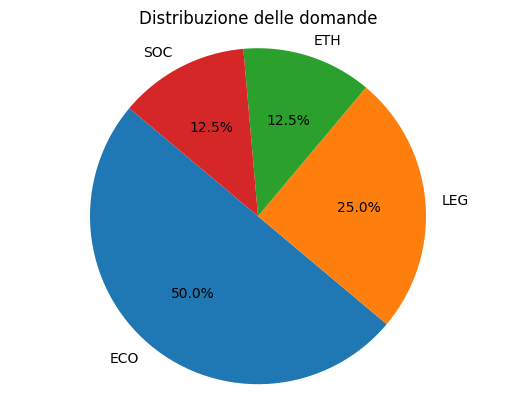

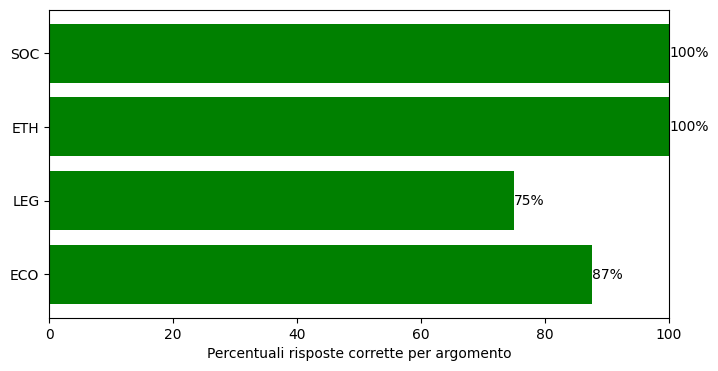

In [10]:
# Grafico a torta per la distribuzione delle domande
categorie = [percorso_formativo for percorso_formativo, count in count_by_percorso_formativo.items() if count > 0]
valori = [count for count in count_by_percorso_formativo.values() if count > 0]

plt.pie(valori, labels=categorie, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Imposta il grafico a torta in modo circolare
plt.title('Distribuzione delle domande')

# Grafico a barre orizzontali per le percentuali di risposte corrette per argomento
percentuali = [(correct_count_by_percorso_formativo[key] / count_by_percorso_formativo[key]) * 100 for key in categorie]

plt.figure(figsize=(8, 4))  # Imposta la dimensione del grafico a barre
plt.barh(categorie, percentuali, color='green')
plt.xlim(0, 100)  # Imposta i limiti dell'asse x
plt.xlabel('Percentuali risposte corrette per argomento')

# Aggiungi le percentuali come etichette sulle barre
for i, percentuale in enumerate(percentuali):
    plt.text(percentuale, i, f'{int(percentuale)}%', va='center')

# Mostra il grafico a barre orizzontali
plt.show()

## Correzione

In [11]:
# Ciclo attraverso i risultati delle domande e le risposte
for i in range(QUESTIONS_NUMBER):
    # Mostra l'output HTML rappresentando la domanda e la risposta
    display(
        HTML(
            str(questionsData[i].html_repr(answers[i]))
        )
    )